In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [2]:
df=pd.DataFrame()

In [3]:
df['x1']=[1,7,9,4,3,5,2,7,3,9]
df['x2']=[1,6,3,9,4,3,2,5,1,7]
df['label']=[1,0,1,0,1,1,1,0,1,1]

In [4]:
df

,x1,x2,label
0,1,1,1
1,7,6,0
2,9,3,1
3,4,9,0
4,3,4,1
5,5,3,1
6,2,2,1
7,7,5,0
8,3,1,1
9,9,7,1


<AxesSubplot: xlabel='x1', ylabel='x2'>

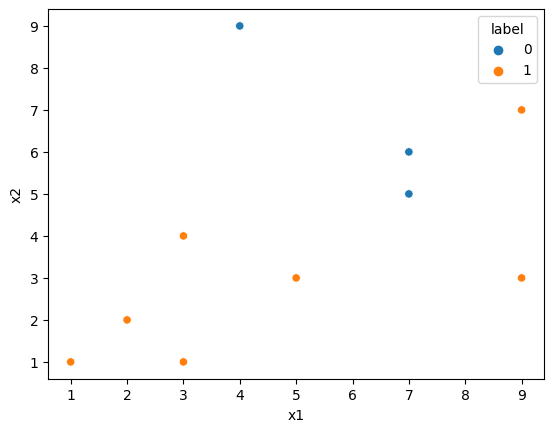

In [5]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [6]:
df['weights']=1/df.shape[0]

In [7]:
df


,x1,x2,label,weights
0,1,1,1,0.1
1,7,6,0,0.1
2,9,3,1,0.1
3,4,9,0,0.1
4,3,4,1,0.1
5,5,3,1,0.1
6,2,2,1,0.1
7,7,5,0,0.1
8,3,1,1,0.1
9,9,7,1,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dc=DecisionTreeClassifier(max_depth=1)

In [10]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [11]:
x

array([[1, 1],
       [7, 6],
       [9, 3],
       [4, 9],
       [3, 4],
       [5, 3],
       [2, 2],
       [7, 5],
       [3, 1],
       [9, 7]], dtype=int64)

In [12]:
dc.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [13]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

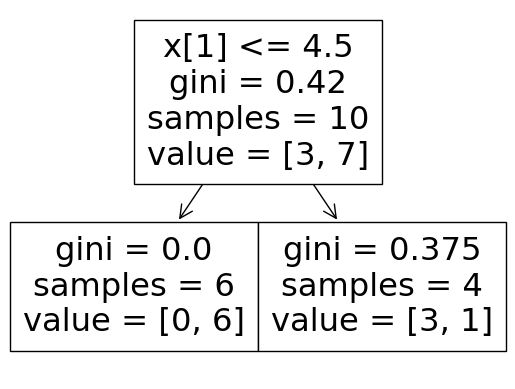

In [14]:
plot_tree(dc)

<AxesSubplot: >

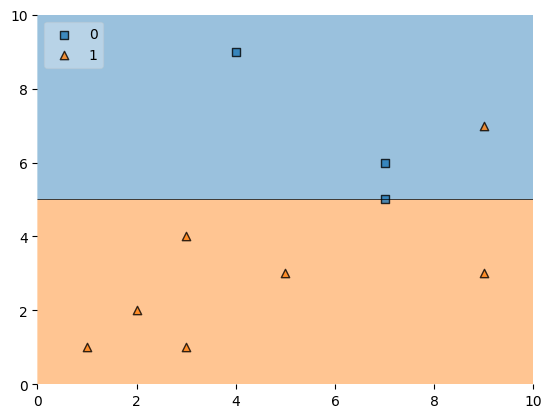

In [15]:
plot_decision_regions(x,y,clf=dc,legend=2)

In [16]:
df['y_pred']=dc.predict(x)

In [17]:
df

,x1,x2,label,weights,y_pred
0,1,1,1,0.1,1
1,7,6,0,0.1,0
2,9,3,1,0.1,1
3,4,9,0,0.1,0
4,3,4,1,0.1,1
5,5,3,1,0.1,1
6,2,2,1,0.1,1
7,7,5,0,0.1,0
8,3,1,1,0.1,1
9,9,7,1,0.1,0


In [18]:
def calculatemodelwt(error):
    return 0.5*np.log((1-error)/error)

In [19]:
alpha1=calculatemodelwt(0.1)
alpha1

1.0986122886681098

In [20]:
def updat(row,alpha=1.098):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [21]:
df['updated_weight']=df.apply(updat,axis=1)

In [22]:
df

,x1,x2,label,weights,y_pred,updated_weight
0,1,1,1,0.1,1,0.033354
1,7,6,0,0.1,0,0.033354
2,9,3,1,0.1,1,0.033354
3,4,9,0,0.1,0,0.033354
4,3,4,1,0.1,1,0.033354
5,5,3,1,0.1,1,0.033354
6,2,2,1,0.1,1,0.033354
7,7,5,0,0.1,0,0.033354
8,3,1,1,0.1,1,0.033354
9,9,7,1,0.1,0,0.299816


In [23]:
df['normalized weight']=df['updated_weight']/df['updated_weight'].sum()

In [24]:
df

,x1,x2,label,weights,y_pred,updated_weight,normalized weight
0,1,1,1,0.1,1,0.033354,0.055590
1,7,6,0,0.1,0,0.033354,0.055590
2,9,3,1,0.1,1,0.033354,0.055590
3,4,9,0,0.1,0,0.033354,0.055590
4,3,4,1,0.1,1,0.033354,0.055590
5,5,3,1,0.1,1,0.033354,0.055590
6,2,2,1,0.1,1,0.033354,0.055590
7,7,5,0,0.1,0,0.033354,0.055590
8,3,1,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,0,0.299816,0.499694


In [25]:
df['updated_weight'].sum()

0.6000001124692275

In [26]:
df['normalized weight'].sum()

1.0

In [27]:
df['cumsum_upper']=np.cumsum(df['normalized weight'])

In [28]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized weight']

In [29]:
df[['x1','x2','label','weights','y_pred','updated_weight','cumsum_upper','cumsum_lower']]

,x1,x2,label,weights,y_pred,updated_weight,cumsum_upper,cumsum_lower
0,1,1,1,0.1,1,0.033354,0.055590,0.000000
1,7,6,0,0.1,0,0.033354,0.111179,0.055590
2,9,3,1,0.1,1,0.033354,0.166769,0.111179
3,4,9,0,0.1,0,0.033354,0.222358,0.166769
4,3,4,1,0.1,1,0.033354,0.277948,0.222358
5,5,3,1,0.1,1,0.033354,0.333537,0.277948
6,2,2,1,0.1,1,0.033354,0.389127,0.333537
7,7,5,0,0.1,0,0.033354,0.444717,0.389127
8,3,1,1,0.1,1,0.033354,0.500306,0.444717
9,9,7,1,0.1,0,0.299816,1.000000,0.500306


In [30]:
def create_new_dataset(df):
    indices=[]
    
    for i in range (df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if(row['cumsum_upper']>a and a>row['cumsum_lower']):
                indices.append(index)
    return indices           

In [31]:
index_values=create_new_dataset(df)
index_values

[0, 9, 9, 9, 3, 9, 9, 9, 9, 1]

In [32]:
secdf=df.iloc[index_values,[0,1,2,3]]

In [33]:
secdf

,x1,x2,label,weights
0,1,1,1,0.1
9,9,7,1,0.1
9,9,7,1,0.1
9,9,7,1,0.1
3,4,9,0,0.1
9,9,7,1,0.1
9,9,7,1,0.1
9,9,7,1,0.1
9,9,7,1,0.1
1,7,6,0,0.1


In [34]:
dc2=DecisionTreeClassifier(max_depth=1)

In [35]:
x=secdf.iloc[:,0:2].values
y=secdf.iloc[:,2].values

In [36]:
dc2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

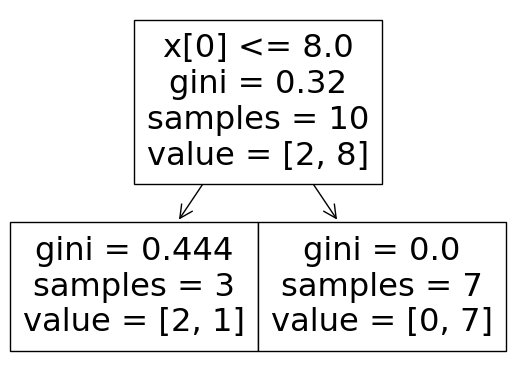

In [37]:
plot_tree(dc2)

<AxesSubplot: >

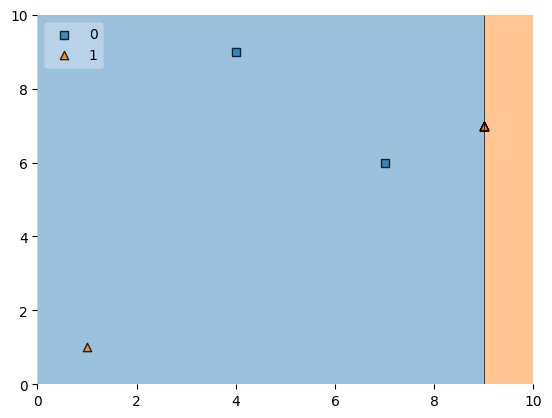

In [38]:
plot_decision_regions(x,y,clf=dc2,legend=2)

In [39]:
secdf['y_pred']=dc2.predict(x)

In [40]:
secdf

,x1,x2,label,weights,y_pred
0,1,1,1,0.1,0
9,9,7,1,0.1,1
9,9,7,1,0.1,1
9,9,7,1,0.1,1
3,4,9,0,0.1,0
9,9,7,1,0.1,1
9,9,7,1,0.1,1
9,9,7,1,0.1,1
9,9,7,1,0.1,1
1,7,6,0,0.1,0


In [41]:
alpha2=calculatemodelwt(0.1)
alpha2

1.0986122886681098

In [42]:
def update_row_weigths(row,alpha=1.098):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [43]:
secdf['updated_weight']=secdf.apply(update_row_weigths,axis=1)

In [44]:
secdf

,x1,x2,label,weights,y_pred,updated_weight
0,1,1,1,0.1,0,0.299816
9,9,7,1,0.1,1,0.033354
9,9,7,1,0.1,1,0.033354
9,9,7,1,0.1,1,0.033354
3,4,9,0,0.1,0,0.033354
9,9,7,1,0.1,1,0.033354
9,9,7,1,0.1,1,0.033354
9,9,7,1,0.1,1,0.033354
9,9,7,1,0.1,1,0.033354
1,7,6,0,0.1,0,0.033354


In [45]:
secdf['normalized_weights']=secdf['updated_weight']/secdf['updated_weight'].sum()

In [46]:
secdf

,x1,x2,label,weights,y_pred,updated_weight,normalized_weights
0,1,1,1,0.1,0,0.299816,0.499694
9,9,7,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
3,4,9,0,0.1,0,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
9,9,7,1,0.1,1,0.033354,0.055590
1,7,6,0,0.1,0,0.033354,0.055590


In [47]:
secdf['cumsum_upper']=np.cumsum(secdf['normalized_weights'])

In [48]:
secdf['cumsum_lower']=secdf['cumsum_upper']-secdf['normalized_weights']


In [49]:
secdf[['x1','x2','label','y_pred','updated_weight','cumsum_upper','cumsum_lower']]

,x1,x2,label,y_pred,updated_weight,cumsum_upper,cumsum_lower
0,1,1,1,0,0.299816,0.499694,0.000000
9,9,7,1,1,0.033354,0.555283,0.499694
9,9,7,1,1,0.033354,0.610873,0.555283
9,9,7,1,1,0.033354,0.666463,0.610873
3,4,9,0,0,0.033354,0.722052,0.666463
9,9,7,1,1,0.033354,0.777642,0.722052
9,9,7,1,1,0.033354,0.833231,0.777642
9,9,7,1,1,0.033354,0.888821,0.833231
9,9,7,1,1,0.033354,0.944410,0.888821
1,7,6,0,0,0.033354,1.000000,0.944410


In [50]:
index_values=create_new_dataset(secdf)

In [51]:
third_df=secdf.iloc[index_values,[0,1,2,3]]

In [52]:
third_df

,x1,x2,label,weights
0,1,1,1,0.1
0,1,1,1,0.1
0,1,1,1,0.1
1,7,6,0,0.1
1,7,6,0,0.1
0,1,1,1,0.1
9,9,7,1,0.1
1,7,6,0,0.1
1,7,6,0,0.1
0,1,1,1,0.1


In [53]:
dc3=DecisionTreeClassifier(max_depth=1)

In [54]:
x=third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values


In [55]:
dc3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

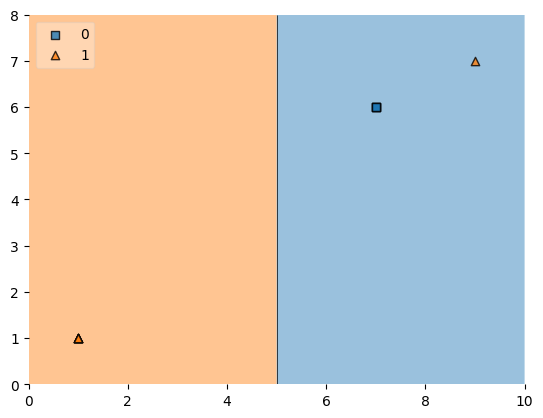

In [56]:
plot_decision_regions(x,y,clf=dc3,legend=2)

In [57]:
third_df['y_pred']=dc3.predict(x)

In [58]:
third_df

,x1,x2,label,weights,y_pred
0,1,1,1,0.1,1
0,1,1,1,0.1,1
0,1,1,1,0.1,1
1,7,6,0,0.1,0
1,7,6,0,0.1,0
0,1,1,1,0.1,1
9,9,7,1,0.1,0
1,7,6,0,0.1,0
1,7,6,0,0.1,0
0,1,1,1,0.1,1


In [60]:
alpha3=calculatemodelwt(0.1)
alpha3

1.0986122886681098

In [61]:
print(alpha1,alpha2,alpha3)

1.0986122886681098 1.0986122886681098 1.0986122886681098


In [64]:
query=np.array([3,4]).reshape(1,2)
dc.predict(query)

array([1], dtype=int64)

In [65]:
dc2.predict(query)

array([0], dtype=int64)

In [67]:
dc3.predict(query)

array([1], dtype=int64)

In [68]:
alpha1*1+alpha2*1+alpha3*1

3.295836866004329

In [71]:
np.sign(3.29)

1.0